# Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import glob
import re
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plotting styles
plt.style.use('ggplot')
sns.set(font_scale=1.2)

In [2]:
# Load the processed data
def load_latest_processed_data():
    # Get list of processed data files
    data_files = glob.glob(os.path.join('..', 'data', 'processed', 'processed_tweets_*.csv'))
    
    # If no files found, raise error
    if not data_files:
        raise FileNotFoundError("No processed data files found. Run preprocess_data.py first.")
    
    # Sort by filename (date)
    latest_file = sorted(data_files)[-1]
    print(f"Loading data from {latest_file}")
    
    # Load the data
    df = pd.read_csv(latest_file)
    
    # Convert date columns to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = pd.to_datetime(df['date'])
    df['processed_date'] = pd.to_datetime(df['processed_date'])
    
    return df

In [3]:
# Load the data
df = load_latest_processed_data()

# Display basic information
print("Dataset Shape:", df.shape)
df.info()

Loading data from ..\data\processed\processed_tweets_20250324.csv
Dataset Shape: (59, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              59 non-null     int64              
 1   text            59 non-null     object             
 2   created_at      59 non-null     datetime64[ns, UTC]
 3   lang            59 non-null     object             
 4   retweet_count   59 non-null     int64              
 5   reply_count     59 non-null     int64              
 6   like_count      59 non-null     int64              
 7   source          30 non-null     object             
 8   query           59 non-null     object             
 9   category        59 non-null     object             
 10  date            59 non-null     datetime64[ns]     
 11  hour            59 non-null     int64              
 12  day_

In [4]:
# Show the first few rows
df.head()

,id,text,created_at,lang,retweet_count,reply_count,like_count,source,query,category,date,hour,day_of_week,cleaned_text,readable_text,entities,text_length,word_count,processed_date
0,1000000000000000000,Just got the new iPhone 15 Pro Max and the cam...,2025-03-24 17:54:36.956172+00:00,en,23,27,135,Twitter for Android,iPhone,iphone,2025-03-24,17,Monday,got new pro max camera absolutely amazing,just got the new iphone pro max and the camera...,"{'CARDINAL': ['15'], 'MONEY': ['iPhone']}",80,7,2025-03-24
1,1000000000000000001,Battery life on this iPhone is disappointing. ...,2025-03-24 15:54:36.956172+00:00,en,10,29,83,Twitter for Android,#iPhone,iphone,2025-03-24,15,Monday,battery life disappointing barely last half da...,battery life on this iphone is disappointing b...,"{'ORG': ['iPhone'], 'DATE': ['half a day']}",86,9,2025-03-24
2,1000000000000000002,Apple's iOS updates are so smooth. Love how my...,2025-03-24 13:54:36.956172+00:00,en,28,5,173,Twitter for iPhone,iPhone,iphone,2025-03-24,13,Monday,apple io update smooth love work,apples ios updates are so smooth love how my i...,{'ORG': ['Apple']},65,6,2025-03-24
3,1000000000000000003,The iPhone display is gorgeous but I wish it d...,2025-03-24 11:54:36.956172+00:00,en,47,17,88,Twitter for Android,Apple iPhone,iphone,2025-03-24,11,Monday,display gorgeous wish didnt notch top,the iphone display is gorgeous but i wish it d...,{'ORG': ['iPhone']},79,6,2025-03-24
4,1000000000000000004,iPhone prices are getting ridiculous. Is it re...,2025-03-24 09:54:36.956172+00:00,en,12,19,85,Twitter for Web,#iPhone,iphone,2025-03-24,9,Monday,price getting ridiculous really worth,iphone prices are getting ridiculous is it rea...,{'MONEY': ['1200']},75,5,2025-03-24


In [5]:
# Display basic statistics
df.describe()

,id,retweet_count,reply_count,like_count,date,hour,text_length,word_count,processed_date
count,5.900000e+01,59.000000,59.000000,59.000000,59,59.000000,59.000000,59.000000,59
mean,1.698728e+18,16.135593,7.949153,47.762712,2025-03-23 19:07:07.118643968,17.711864,111.559322,9.389831,2025-03-24 00:00:00
min,1.000000e+18,0.000000,0.000000,0.000000,2025-03-23 00:00:00,1.000000,36.000000,1.000000,2025-03-24 00:00:00
25%,1.452150e+18,0.000000,0.000000,0.000000,2025-03-24 00:00:00,13.000000,75.500000,6.000000,2025-03-24 00:00:00
50%,1.904306e+18,10.000000,1.000000,7.000000,2025-03-24 00:00:00,23.000000,83.000000,8.000000,2025-03-24 00:00:00
75%,1.952158e+18,35.000000,16.500000,82.500000,2025-03-24 00:00:00,23.000000,121.500000,10.000000,2025-03-24 00:00:00
max,2.000000e+18,49.000000,29.000000,199.000000,2025-03-24 00:00:00,23.000000,307.000000,30.000000,2025-03-24 00:00:00
std,4.133635e+17,18.331674,10.247664,60.574075,NaN,6.945728,64.971949,5.924866,NaN


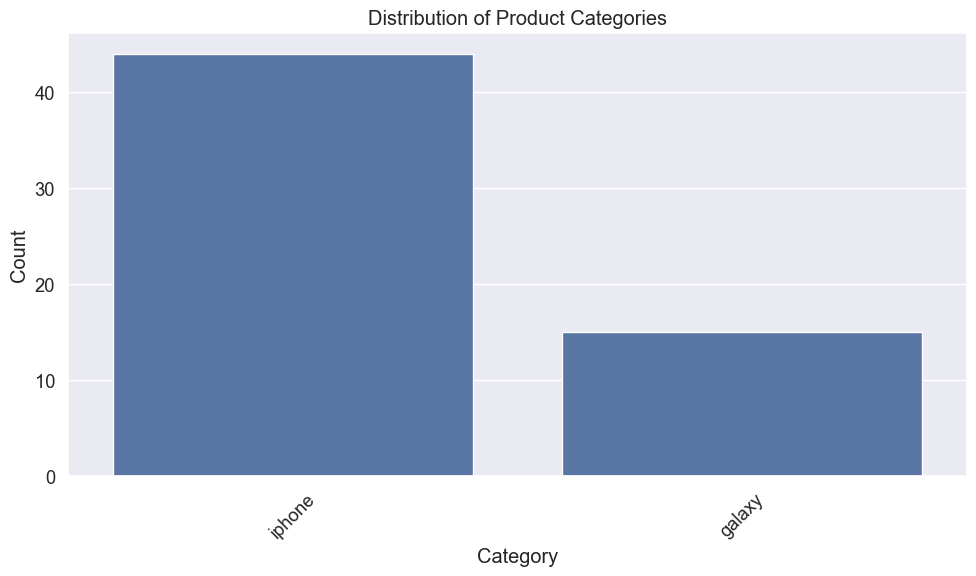

In [6]:
# Check category distribution
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

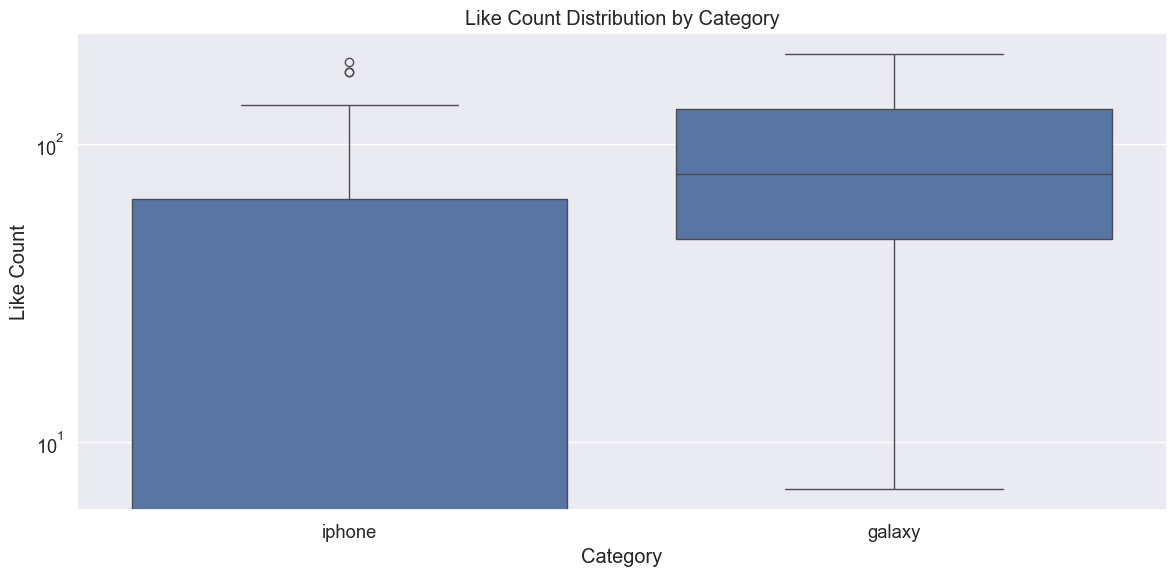

In [7]:
# Analyze tweet engagement by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='like_count', data=df)
plt.title('Like Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Like Count')
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

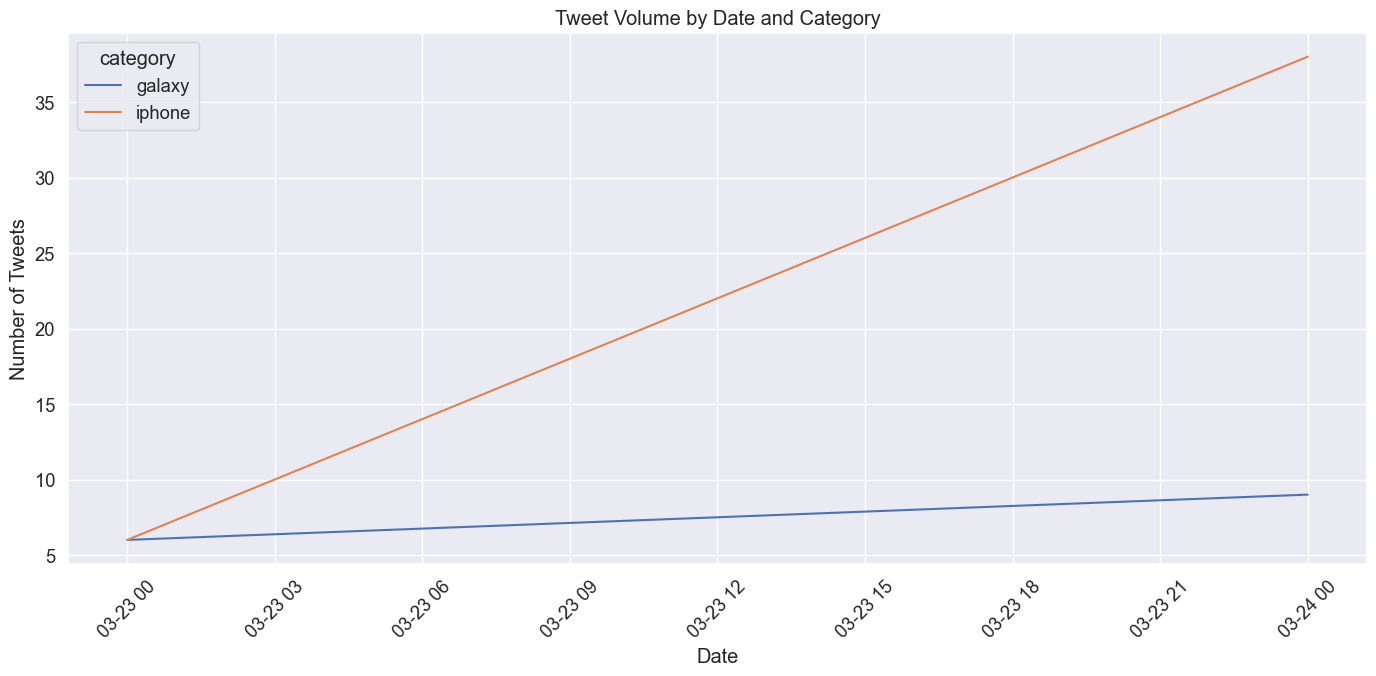

In [8]:
# Analyze posting frequency over time
df_daily = df.groupby(['date', 'category']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='count', hue='category', data=df_daily)
plt.title('Tweet Volume by Date and Category')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

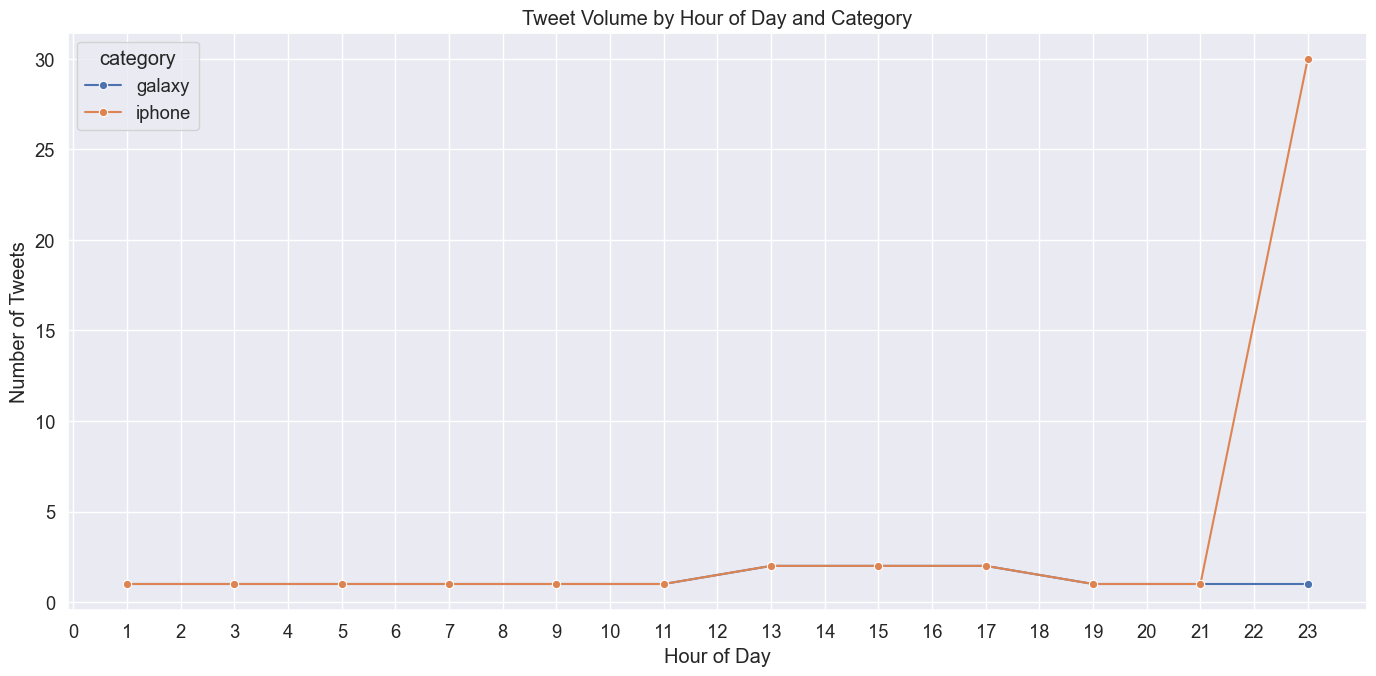

In [9]:
# Analyze posting activity by hour of day
hourly_counts = df.groupby(['hour', 'category']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='count', hue='category', data=hourly_counts, marker='o')
plt.title('Tweet Volume by Hour of Day and Category')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

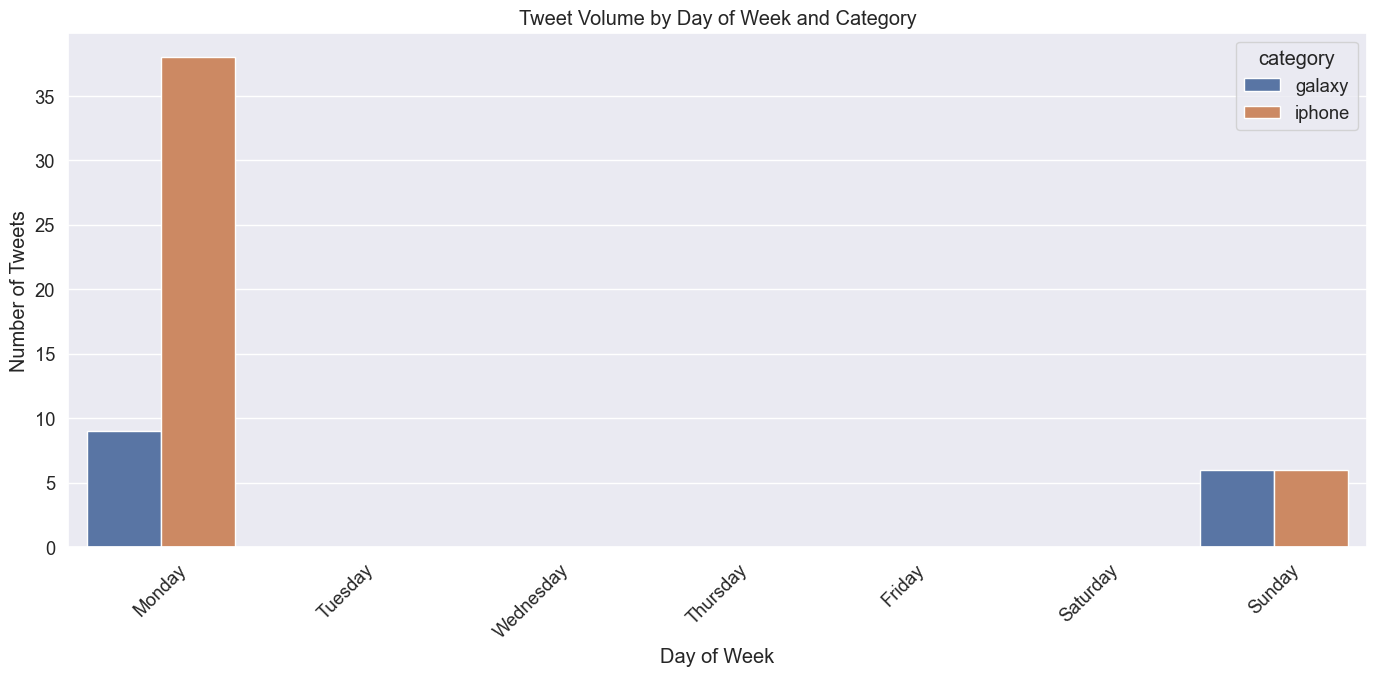

In [10]:
# Analyze posting activity by day of week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df.groupby(['day_of_week', 'category']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.barplot(x='day_of_week', y='count', hue='category', data=dow_counts, order=dow_order)
plt.title('Tweet Volume by Day of Week and Category')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

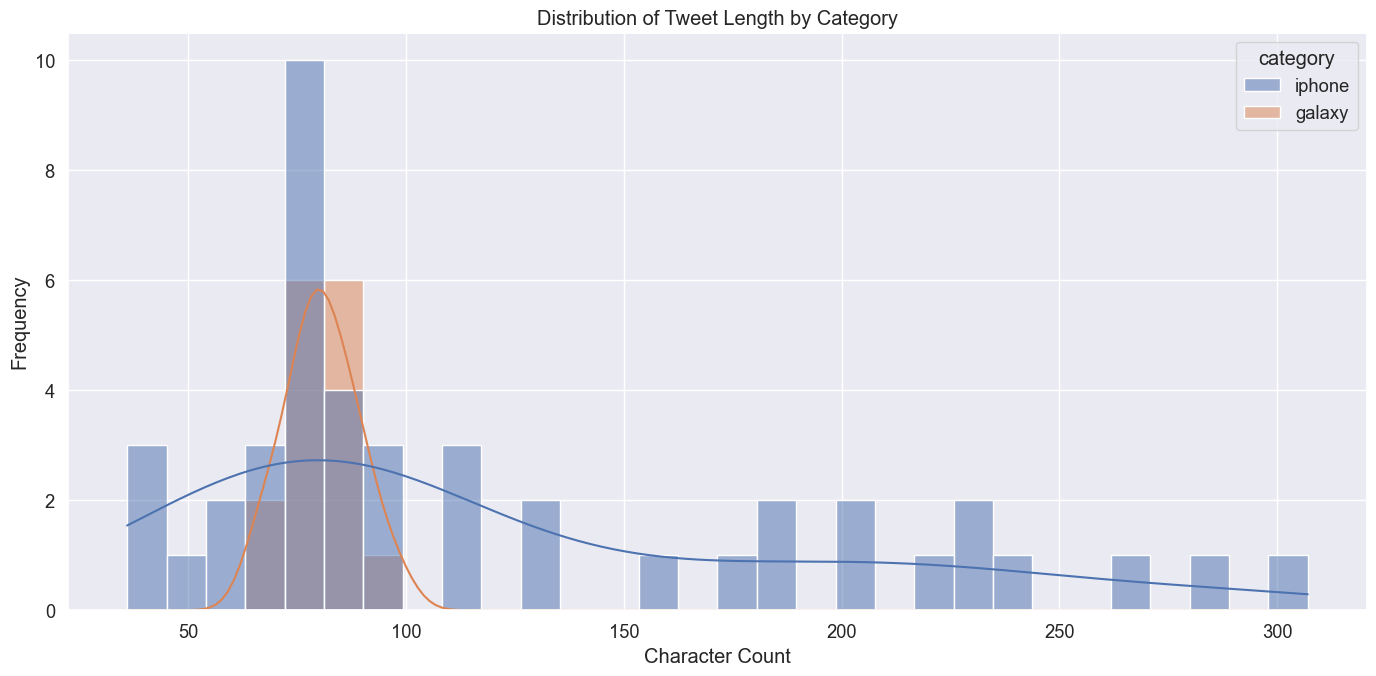

In [11]:
# Analyze text length distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='text_length', hue='category', bins=30, kde=True)
plt.title('Distribution of Tweet Length by Category')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

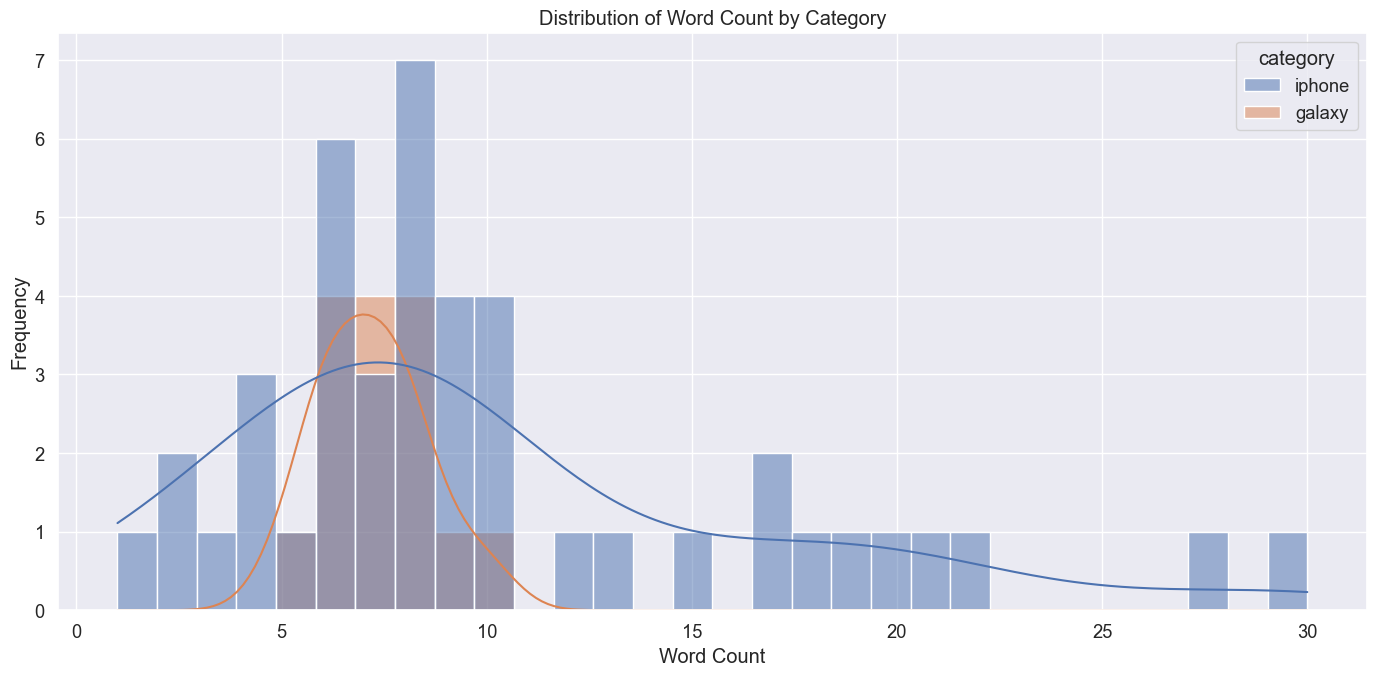

In [12]:
# Analyze word count distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='word_count', hue='category', bins=30, kde=True)
plt.title('Distribution of Word Count by Category')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

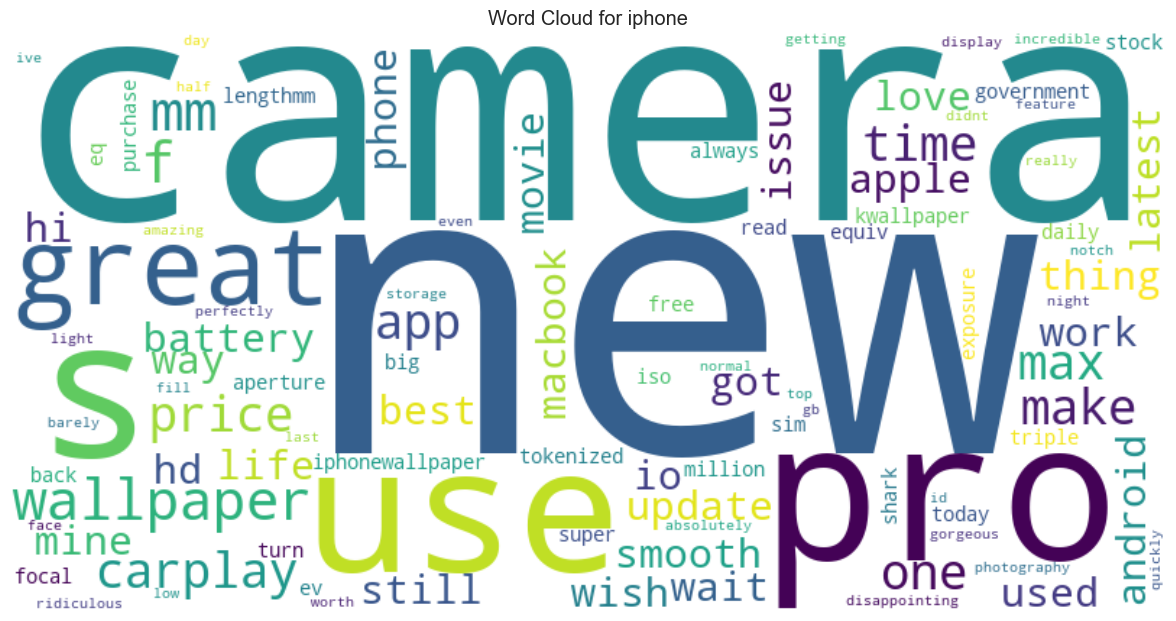

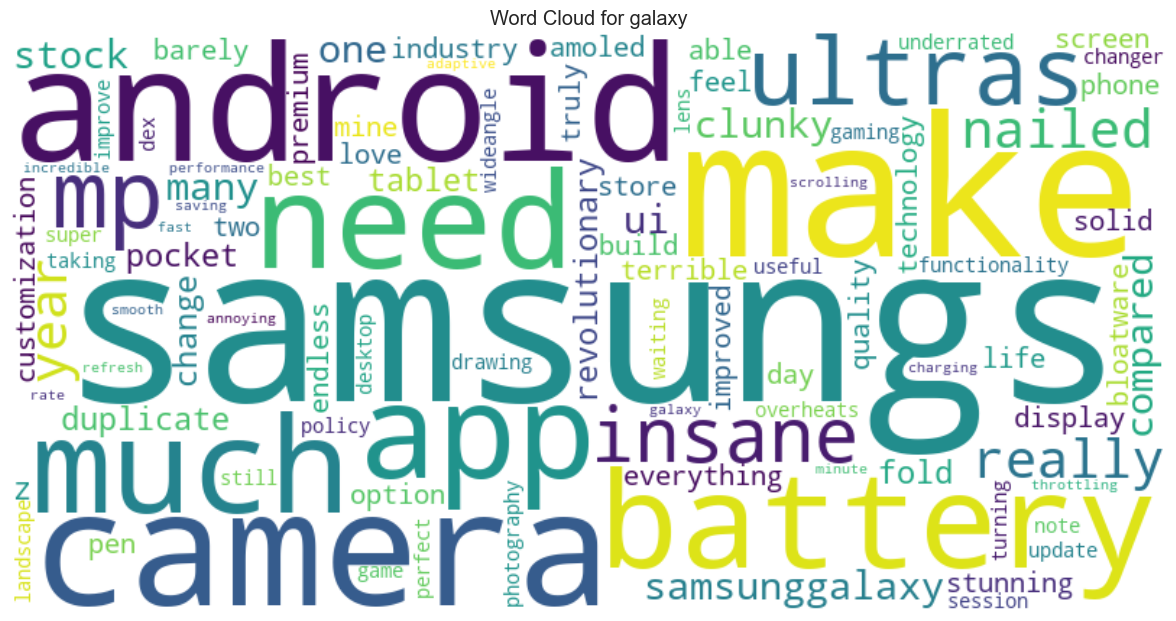

In [13]:
# Generate word clouds for each category
def generate_wordcloud(category_name):
    # Filter data by category
    category_df = df[df['category'] == category_name]
    
    # Combine all cleaned text
    text = ' '.join(category_df['cleaned_text'].dropna())
    
    # Generate wordcloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='viridis',
        contour_width=1,
        contour_color='steelblue'
    ).generate(text)
    
    # Display the wordcloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category_name}')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Generate word clouds for each category
for category in df['category'].unique():
    generate_wordcloud(category)

# Top words by category
def get_top_words(category_name, n=20):
    # Filter data by category
    category_df = df[df['category'] == category_name]
    
    # Combine all cleaned text
    text = ' '.join(category_df['cleaned_text'].dropna())
    
    # Split into words and count
    words = text.split()
    word_counts = Counter(words)
    
    # Get top words
    top_words = word_counts.most_common(n)
    
    return pd.DataFrame(top_words, columns=['word', 'count'])

C:\Users\akash\AppData\Local\Temp\ipykernel_4696\633585986.py:10: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\akash\anaconda3\envs\sentiment-analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128242 (\N{MOBILE PHONE WITH RIGHTWARDS ARROW AT LEFT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


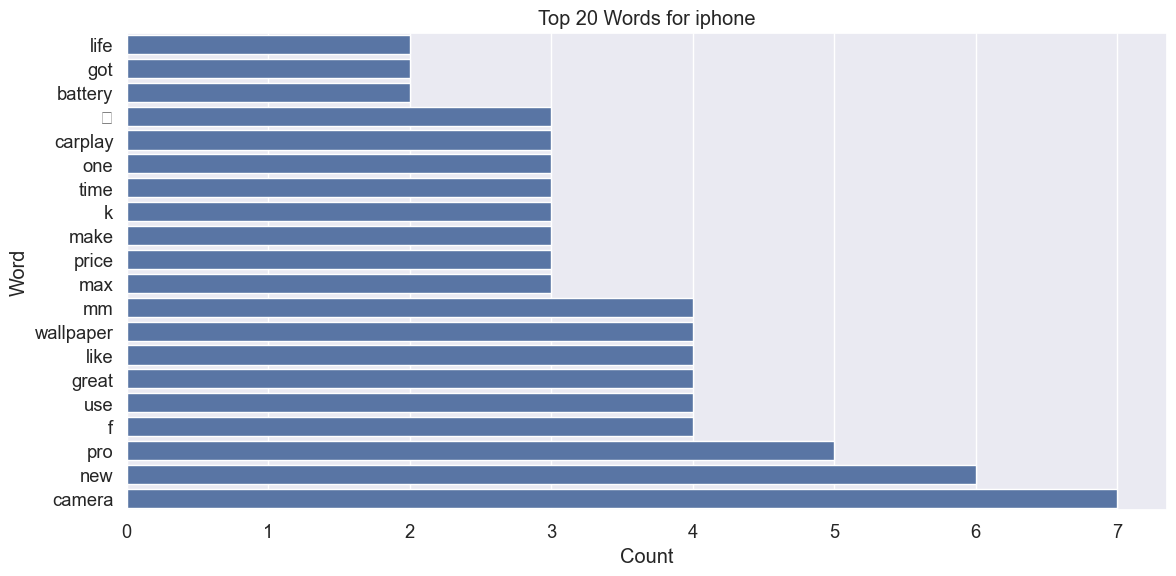

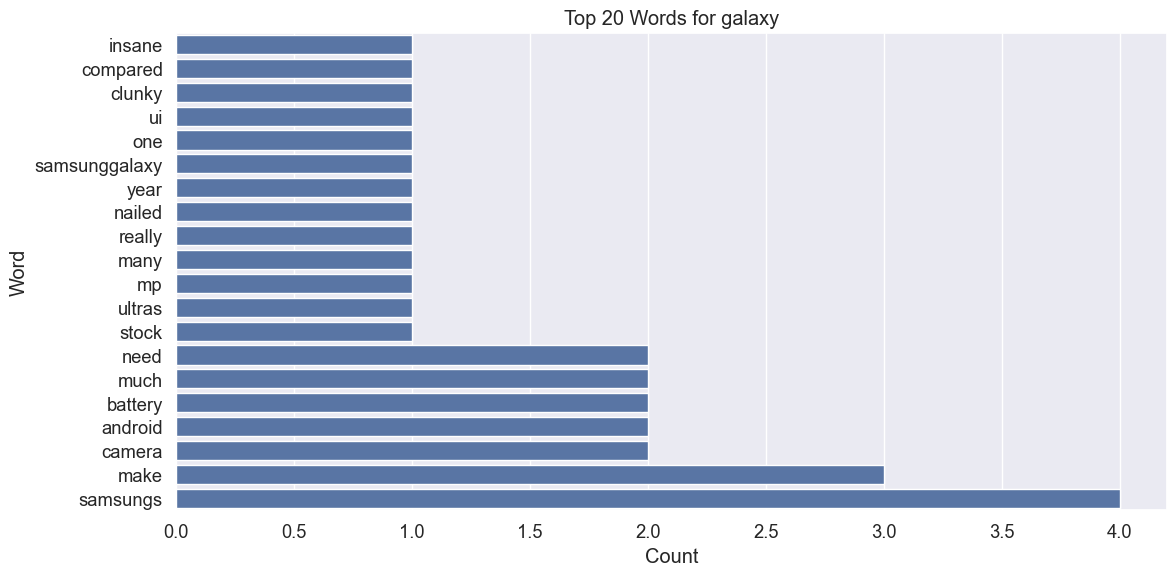

In [14]:
# Display top words for each category
for category in df['category'].unique():
    top_words_df = get_top_words(category)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(y='word', x='count', data=top_words_df.sort_values('count'))
    plt.title(f'Top 20 Words for {category}')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

<Figure size 1400x800 with 0 Axes>

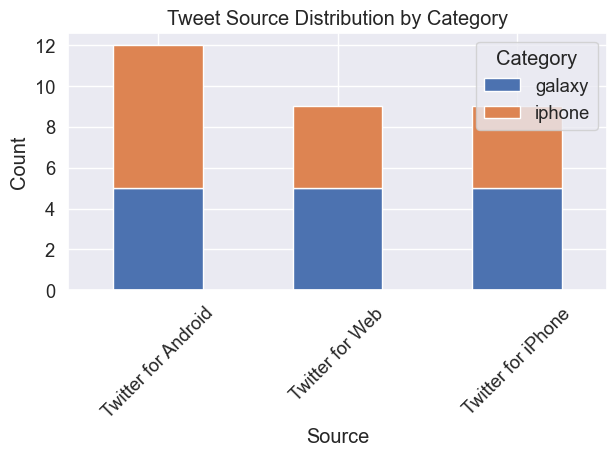

In [15]:
# Source distribution analysis
source_counts = df.groupby(['source', 'category']).size().reset_index(name='count')
top_sources = source_counts.groupby('source')['count'].sum().nlargest(10).index

# Filter to top sources
source_counts_filtered = source_counts[source_counts['source'].isin(top_sources)]

plt.figure(figsize=(14, 8))
source_pivot = source_counts_filtered.pivot(index='source', columns='category', values='count').fillna(0)
source_pivot.plot(kind='bar', stacked=True)
plt.title('Tweet Source Distribution by Category')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [16]:
# Interactive visualizations with Plotly
# Daily tweet volume
fig = px.line(df_daily, x='date', y='count', color='category',
              title='Tweet Volume Over Time by Category',
              labels={'count': 'Number of Tweets', 'date': 'Date', 'category': 'Category'},
              line_shape='spline', render_mode='svg')
fig.update_layout(hovermode='x unified')
fig.show()

In [17]:
# Engagement metrics by category
fig = make_subplots(rows=1, cols=3, 
                   subplot_titles=('Likes', 'Retweets', 'Replies'),
                   shared_yaxes=True)

metrics = ['like_count', 'retweet_count', 'reply_count']
cols = [1, 2, 3]

for metric, col in zip(metrics, cols):
    for i, category in enumerate(df['category'].unique()):
        category_data = df[df['category'] == category][metric]
        
        fig.add_trace(
            go.Box(y=category_data, name=category, showlegend=(col==1)),
            row=1, col=col
        )

fig.update_layout(title_text='Engagement Metrics by Category',
                 height=500, width=1000,
                 boxmode='group')
fig.show()

In [18]:
# Word count vs. engagement scatter plot
fig = px.scatter(df, x='word_count', y='like_count', color='category',
                size='retweet_count', hover_data=['cleaned_text'],
                title='Relationship Between Word Count and Likes',
                labels={'word_count': 'Word Count', 'like_count': 'Like Count'},
                log_y=True)
fig.update_layout(height=600, width=1000)
fig.show()

In [19]:
# Save the data for further analysis
output_path = os.path.join('..', 'data', 'processed', 'eda_summary.csv')
df.groupby('category').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'like_count': ['mean', 'median', 'sum'],
    'retweet_count': ['mean', 'median', 'sum'],
    'reply_count': ['mean', 'median', 'sum']
}).to_csv(output_path)
print(f"Saved EDA summary to {output_path}")

Saved EDA summary to ..\data\processed\eda_summary.csv
